Linear Regression in Pytorch

In [171]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import random

Create Arrays

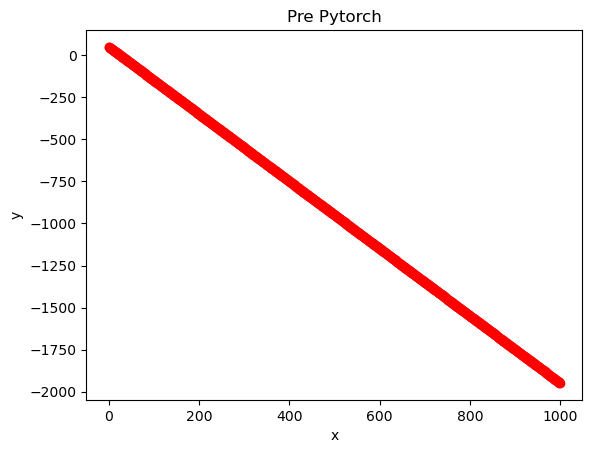

In [172]:
X = np.array([X for X in range(1000)]) #create a 1D array of 1000 elements
X = X.reshape(-1,1) #reshape into a column vector

y = 50 - 2*X

plt.scatter(X,y,color = 'r', label = 'initial data')
plt.title('Pre Pytorch')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



Normalise the data

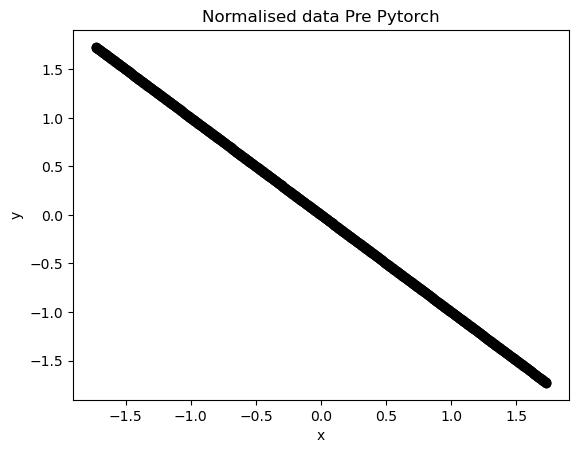

In [173]:
x_mean, x_std = X.mean(), X.std()
y_mean, y_std = y.mean(),y.std()

#normalise to scale all values to similar range

X_normalised = (X-x_mean)/x_std
y_normalised = (y-y_mean)/y_std

#create tensors from these values
x_tensor = torch.tensor(X_normalised,dtype=torch.float32)
y_tensor = torch.tensor(y_normalised,dtype = torch.float32)

plt.scatter(X_normalised,y_normalised,color = 'k', label = 'initial data')
plt.title('Normalised data Pre Pytorch')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Creating the Linear Regression Model

In [174]:
class LinearRegressionModel(nn.Module):  # Create a class inheriting from nn.Module

    # Set up constructor
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)  # Fix: Use lowercase 'l' for the linear layer

    # Set up forward pass
    def forward(self, x):
        return self.linear(x)  # Pass 'x' through the linear layer


in_features = 1 #1 input of x
out_features = 1 #1 output of y

model = LinearRegressionModel(in_features,out_features) #create instance of model

criterion = nn.MSELoss() #mean squared arror loss function
optimiser = optim.SGD(model.parameters(), lr = 0.005 )#set up learnign rate


        


Set up training Loop

In [175]:
num_epochs = int(input("how many epochs?"))

for epoch in range(num_epochs):

    outputs = model(x_tensor)
    loss = criterion(outputs,y_tensor)

    #run the backward pass and optimise
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()


Change the model to make predictions

In [176]:
new_x = 150

new_x_normalised = (new_x-x_mean)/x_std

new_x_tensor = torch.tensor(new_x_normalised, dtype= torch.float32)
new_x_tensor = new_x_tensor.reshape(-1,1) 

model.eval() #change model tto evaluation mode

with torch.no_grad():
    prediction_normalised = model(new_x_tensor)

prediction_denormalised = prediction_normalised.item()* y_std + y_mean #denormalise t get actual number



Plot the final data

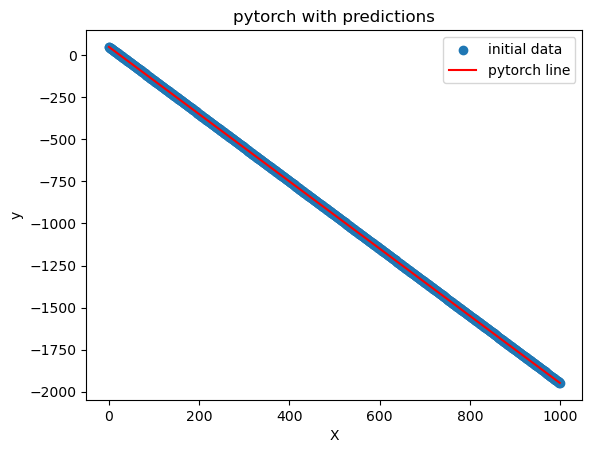

In [177]:
plt.scatter(X,y, label = 'initial data')
fit_line = model(x_tensor).detach().numpy()* y_std + y_mean
plt.plot(X,fit_line,'r', label = 'pytorch line')
plt.title('pytorch with predictions')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()